In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
# python visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

In [12]:
# load dataset
data=pd.read_csv('test_mbti.csv',index_col='type')
print(data.shape)
print(data[0:5])

(6318, 1)
                                                  posts
type                                                   
ENTJ  'You're fired.|||That's another silly misconce...
ENFJ  'https://www.youtube.com/watch?v=PLAaiKvHvZs||...
ENTJ  'Now I'm interested. But too lazy to go resear...
ENTJ  'Still going strong at just over the two year ...
ISFP  'They paint without numbers|||I'd guess at ist...


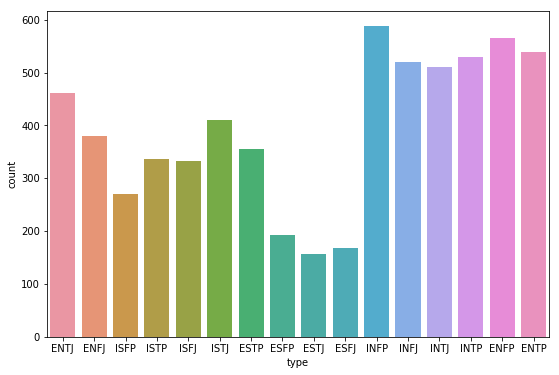

In [29]:
data = pd.read_csv('test_mbti.csv')
dims = (9, 6)
fig, axes = plt.subplots(figsize = dims)
sns.countplot(ax = axes, x = data['type'])
plt.show()

   type                                              posts  words_per_comment
0  ENTJ  'You're fired.|||That's another silly misconce...              19.34
1  ENFJ  'https://www.youtube.com/watch?v=PLAaiKvHvZs||...              15.94
2  ENTJ  'Now I'm interested. But too lazy to go resear...              23.84
3  ENTJ  'Still going strong at just over the two year ...              21.72
4  ISFP  'They paint without numbers|||I'd guess at ist...              18.10


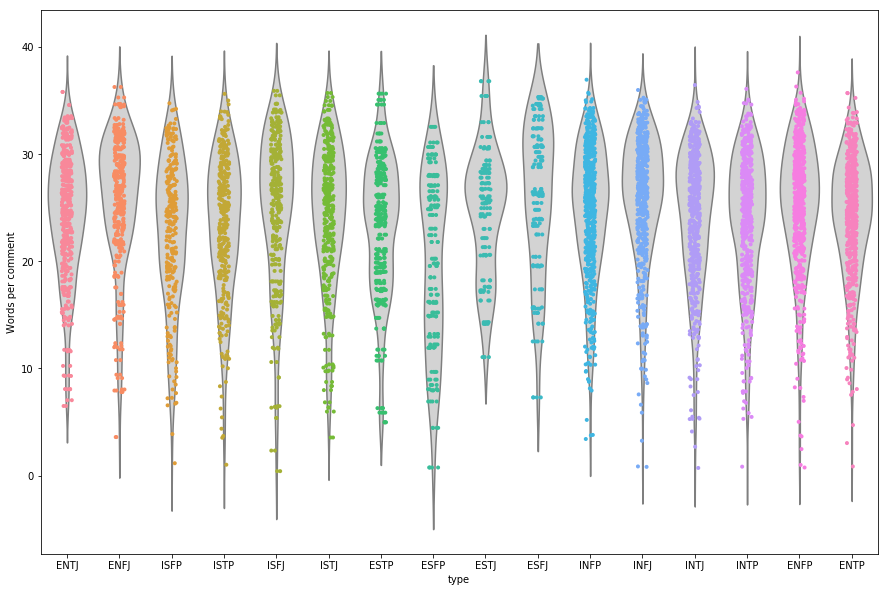

In [4]:
data['words_per_comment'] = data['posts'].apply(lambda x: len(x.split())/50)
print(data.head())
plt.figure(figsize=(15,10))
sns.violinplot(x='type', y='words_per_comment', data=data, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=data, size=4, jitter=True)
plt.ylabel('Words per comment')
plt.show()

In [14]:
from sklearn.preprocessing import LabelBinarizer
text = data
# One hot encode labels
labels=text.index.tolist()
encoder=LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
labels=encoder.fit_transform(labels)
labels=np.array(labels)
print(labels[50:55])
print(labels.shape)

[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]
(6318, 16)


In [15]:
lb = []
for i in labels:
    for j in range(0,16):
        if i[j]==1:
            lb.append(j)
lab = np.array(lb)     
print(lab.shape)

(6318,)


In [16]:
mbti_dict={0:'ENFJ',1:'ENFP',2:'ENTJ',3:'ENTP',4:'ESFJ',5:'ESFP',6:'ESTJ',7:'ESTP',8:'INFJ',9:'INFP',10:'INTJ',11:'INTP',12:'ISFJ',13:'ISFP',14:'ISFP',15:'ISTP'}

In [17]:
import re
# Function to clean the data
def cleaning_the_post(post):
   
    # Covert upper case to lower case
    post = post.lower() 

    # Remove URLs, links and such
    post = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', '', post, flags=re.MULTILINE) 
   
    # Remove ||| between the tweets
    post = post.replace('|||',"") 
    
    # Remove puntuations 
    puncs=['@','#','$','%','^','&','*','(',')','-','_','+','=','{','}','[',']','|','\\','"',"'",';',':','<','>','/']
    for punc in puncs:
        post=post.replace(punc,'') 

    p=[',','.','?','!','\n']
    for punc in p:
        post=post.replace(punc,' ') 
    
    # Remove extra white spaces
    post = re.sub( '\s+', ' ', post ).strip()
    return post

In [18]:
# Clean up the posts
posts = data.posts.tolist()
posts = [cleaning_the_post(post) for post in posts]

In [19]:
# Count the total words
from collections import Counter
word_count = Counter()
for post in posts:
    word_count.update(post.split(" "))
print(len(word_count))
print(word_count)

118317
Counter({'i': 356775, 'to': 219354, 'the': 218417, 'a': 175968, 'and': 175605, 'of': 131353, 'you': 121546, 'that': 106147, 'is': 101378, 'it': 99772, 'in': 91847, 'my': 89436, 'but': 68384, 'for': 68138, 'with': 61084, 'have': 60617, 'me': 59892, 'im': 56754, 'this': 54436, 'be': 54201, 'are': 52576, 'not': 52094, 'like': 50434, 'on': 46350, 'an': 46207, 'as': 44638, 'so': 42067, 'was': 42015, 'just': 40464, 'if': 40449, 'dont': 38518, 'do': 38016, 'or': 37842, 'what': 37440, 'its': 36390, 'think': 36277, 'about': 36247, 'your': 33700, 'people': 33068, 'when': 31840, 'at': 29864, 'can': 29496, 'all': 29090, 'know': 26597, 'they': 26086, 'more': 25878, 'one': 25654, 'really': 25290, 'would': 25205, 'we': 23672, 'get': 23283, 'how': 22746, 'out': 22605, 'because': 22005, 'from': 21868, 'am': 21703, 'he': 21283, 'ive': 20142, 'some': 19790, 'time': 19304, 'very': 18753, 'up': 18625, 'them': 17676, 'there': 17672, 'no': 17566, 'who': 16840, 'much': 16530, 'well': 16512, 'being': 16

In [20]:
vocab_len = len(word_count)
print(vocab_len)

118317


In [21]:
# a look up table 
vocab = sorted(word_count, key=word_count.get, reverse=True)

# dictionary that maps vocabulary words to integers which are indexes
vocab_to_int = {word: i for i, word in enumerate(vocab, 1)}

posts_integers = []
for post in posts:
    posts_integers.append([vocab_to_int[word] for word in post.split()])

print(posts_integers[0])
print(len(posts_integers[0]))

[102, 3885, 98, 251, 1119, 5336, 8, 3750, 9, 2985, 9, 122, 2, 20, 3, 1518, 2, 34425, 439, 10, 9, 7, 36, 7, 21, 4279, 2, 1112, 590, 2, 20, 4854, 15, 2246, 13, 222, 57, 48, 590, 2, 107, 24, 4, 40094, 3035, 4626, 222, 131, 1208, 29, 157, 554, 33, 51, 10, 57, 94, 4854, 116, 2985, 5, 234, 108, 226, 29, 107, 24, 4280, 3035, 181, 435, 1, 318, 20, 443, 37, 3, 266, 30, 7, 21, 48, 131, 144, 6064, 89, 98, 34, 197, 20, 1947, 116, 66, 590, 101, 84, 3053, 10704, 872, 14, 8, 183, 257, 6589, 180, 35, 22, 23, 170, 1357, 106, 7454, 34, 4, 3502, 155, 1, 29, 48, 23, 22121, 3957, 313, 142, 49, 16, 663, 10, 70, 131, 40095, 28, 6767, 57, 28, 69, 25, 2364, 140, 6670, 8, 153, 16, 109, 2723, 24, 158, 35, 47, 113, 2, 3012, 1455, 24, 1902, 467, 13, 1, 49, 16, 29, 632, 3, 1186, 5, 781, 63, 81, 688, 3, 5616, 40096, 377, 4, 14528, 8, 121, 607, 10, 28, 4, 13966, 27492, 5, 99, 1063, 151, 1948, 4, 658, 14, 4, 1308, 6, 3036, 41, 3, 3196, 1537, 6, 395, 1, 221, 439, 1, 16, 41, 12, 15977, 2, 51, 34, 1, 80, 11, 3, 84, 2272,

In [23]:
posts_lens = Counter([len(x) for x in posts])
seq_len = 500
features = np.zeros((len(posts_integers),seq_len),dtype=int)
for i, row in enumerate(posts_integers):
    features[i, -len(row):] = np.array(row)[:seq_len]
print(features[:10])
print(features.shape)

[[  102  3885    98 ...     4  4029  1211]
 [ 5743   401   218 ...   113    46    93]
 [   92    18   358 ...   823   731   116]
 ...
 [    1   134 17859 ...     7   502     5]
 [   65    30     7 ...     2    37   162]
 [    1    78   241 ...   150    35    22]]
(6318, 500)


In [25]:
# Split data into training and test

split_by = 0.8
elements_80 = int(split_by*len(features))
elements_20 = len(features)-elements_80

train_x, val_x = features[:elements_80],features[elements_80:int(elements_20/2)+elements_80]
train_y, val_y = lab[:elements_80],lab[elements_80:int(elements_20/2)+elements_80]
train_y1, val_y1 = labels[:elements_80],labels[elements_80:int(elements_20/2)+elements_80]

test_x = features[elements_80+int(elements_20/2):]
test_y = lab[elements_80+int(elements_20/2):]
test_y1 = labels[elements_80+int(elements_20/2):]
print("Train set: ")
print(train_y)
print(train_x)
print("\nTest Set: ")
print(test_y)
print(test_x)
print("Validation Set: ")
print(val_y)
print(val_x)

Train set: 
[2 0 2 ... 7 2 3]
[[ 102 3885   98 ...    4 4029 1211]
 [5743  401  218 ...  113   46   93]
 [  92   18  358 ...  823  731  116]
 ...
 [7452 1639    1 ...  126    5   57]
 [ 185    2   43 ...   14    3  679]
 [   1   29   31 ...    1   42   32]]

Test Set: 
[ 2 14  2  2 14 14  2 12  2 14  6 12  0  2  5  2  0 14 12  0  7  7  6 14
 12  2  7  2 12  7  0 12 14  4  2  0 14 12  5 12  2 12  0  5  0  2  5  0
  0  2 14 12  4 12 12  2  2 12  6  2 12 12  5  2  0 14 14  7  0 12  2 12
  0  2 12  0 12 14 14  6 12  2 14  2  7 14 12  2  7  0  2  7  6 14  0  0
 14  7 14 14  0  5  0  2 14  2 14  2  0 12 14  2  2  7  2  2  2  2 14  7
 12  2 14 14  6  2 14  0 12  0  2 12  6  6 12 12  2 14  2  2 14  2  0  4
  0 12  2 14  0 14  0  2 12  0  2  0 14  7 14  2  7 14  6 14  0  2  0  4
  2  0  5  2 12  4  2 14 12  7 14  2 12 14  0  0 14 12 14 14  2  2  2 12
 14 12 14  4  7  7  5  7  7  5  7  7  5  6  7  6  5  4  5  4  5  5  7  6
  7  4  7  7  4  6  5  7  7  7  5  4  6  7  7  6  5  6  7  4  5  7  6  4


In [26]:
def evaluate_model(model, validation_x, validation_y): 
    count = 0
    for (a, b) in zip(model.predict(validation_x), validation_y):
        count += (a - b)**2
    return float(count)/len(validation_y)

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg = log_reg.fit(train_x,train_y)

# training accuracy
print("Training accuracy: ", log_reg.score(train_x, train_y))

# testing accuracy
acc = evaluate_model(log_reg, test_x, test_y)
print("Testing accuracy: " , acc)  


Training accuracy:  0.4398496240601504
Testing accuracy:  15.650316455696203


In [30]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest = random_forest.fit(train_x, train_y)

# training accuracy
print("Training accuracy: ", random_forest.score(train_x, train_y))

# testing accuracy
acc = evaluate_model(random_forest, test_x, test_y)
print("Testing accuracy: " , acc)

Training accuracy:  0.9958448753462604
Testing accuracy:  0.375


In [32]:
from sklearn.neighbors import KNeighborsClassifier

kneigh = KNeighborsClassifier(n_neighbors=3)
kneigh.fit(train_x, train_y)

# training accuracy
print("Training accuracy: ", kneigh.score(train_x, train_y))

# testing accuracy
acc = evaluate_model(kneigh, test_x, test_y)
print("Testing accuracy: " , acc)

Training accuracy:  0.461614562722596
Testing accuracy:  15.207278481012658


In [34]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(train_x, train_y)

# training accuracy
print("Training accuracy: ", svm_clf.score(train_x, train_y))

# testing accuracy
acc = evaluate_model(svm_clf, test_x, test_y)
print("Testing accuracy: " , acc)

Training accuracy:  1.0
Testing accuracy:  0.0


In [35]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

cent_clf = NearestCentroid()
cent_clf.fit(train_x, train_y)

# training accuracy
print("Training accuracy: ", cent_clf.score(train_x, train_y))

# testing accuracy
acc = evaluate_model(cent_clf, test_x, test_y)
print("Testing accuracy: " , acc)

Training accuracy:  0.2995647012267511
Testing accuracy:  17.121835443037973


In [37]:
# LSTM
# hyperparameters
size_of_lstm = 256
batch_size = 256
embed_dim = 250
layers = 1
learning_rate = 0.01
n_words = len(vocab_to_int) + 1

# Create the graph object
graph = tf.Graph()

with graph.as_default():
    input_data = tf.placeholder(tf.int32, [None, None], name='inputs')
    labels_ = tf.placeholder(tf.int32, [None, None], name='labels')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    
# Embedding
with graph.as_default():
    embed = tf.Variable(tf.random_uniform(shape=(n_words,embed_dim), minval=-1, maxval=1))
    embedding = tf.nn.embedding_lookup(embed, input_data)
    print(embedding.shape)

# LSTM cell
with graph.as_default():
    # basic LSTM cell
    lstm = tf.contrib.rnn.BasicLSTMCell(size_of_lstm)
    
    # Add dropout to the cell
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob = keep_prob)
    
    # For deep learning, stack up multiple LSTM layers
    cell = tf.contrib.rnn.MultiRNNCell([drop]* layers)
    
    # Getting an initial state of all zeros
    initial_state = cell.zero_state(batch_size, tf.float32)
    
# RNN forward pass
with graph.as_default():
    outputs,final_state = tf.nn.dynamic_rnn(cell, embedding, dtype = tf.float32 )

with graph.as_default():    
    pred = tf.layers.dense(outputs[:,-1], 16, activation = tf.nn.relu)
    predictions = tf.layers.dense(pred, 16, activation = tf.nn.softmax)
    
    cost = tf.losses.mean_squared_error(labels_, predictions)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

with graph.as_default():
    acc_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), labels_)
    accuracy = tf.reduce_mean(tf.cast(acc_pred, tf.float32))

def get_batches(x, y, batch_size=100):    
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for i in range(0, len(x), batch_size):
        yield x[i:i+batch_size], y[i:i+batch_size]


(?, ?, 250)


In [38]:
epochs = 3

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    for e in range(epochs):
        state = sess.run(initial_state)
        
        for i, (x, y) in enumerate(get_batches(train_x, train_y1, batch_size), 1):
            feed = {input_data: x, labels_: y, keep_prob: 1.0, initial_state: state}
            loss, state, _ = sess.run([cost, final_state, optimizer], feed_dict=feed)
            
            if iteration%5==0:
                print("Epoch: {}/{}".format(e, epochs),"Iteration: {}".format(iteration),"Train loss: {:.3f}".format(loss))

            if iteration%25==0:
                val_acc = []
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                for x, y in get_batches(val_x, val_y1, batch_size):
                    feed = {input_data: x, labels_: y, keep_prob: 1, initial_state: val_state}
                    batch_acc, val_state = sess.run([accuracy, final_state], feed_dict=feed)
                    val_acc.append(batch_acc)
                print("Val acc: {:.3f}".format(np.mean(val_acc)))
            iteration +=1
    saver.save(sess, "checkpoints/final_mbti.ckpt")

Epoch: 0/3 Iteration: 5 Train loss: 0.057
Epoch: 0/3 Iteration: 10 Train loss: 0.058
Epoch: 0/3 Iteration: 15 Train loss: 0.059
Epoch: 1/3 Iteration: 20 Train loss: 0.058
Epoch: 1/3 Iteration: 25 Train loss: 0.058
Val acc: 0.938
Epoch: 1/3 Iteration: 30 Train loss: 0.058
Epoch: 1/3 Iteration: 35 Train loss: 0.059
Epoch: 2/3 Iteration: 40 Train loss: 0.059
Epoch: 2/3 Iteration: 45 Train loss: 0.058
Epoch: 2/3 Iteration: 50 Train loss: 0.058
Val acc: 0.938
Epoch: 2/3 Iteration: 55 Train loss: 0.059


In [39]:
test_acc = []
with tf.Session(graph=graph) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    test_state = sess.run(cell.zero_state(batch_size, tf.float32))
    for i, (x, y) in enumerate(get_batches(test_x, test_y1, batch_size), 1):
        feed = {input_data: x, labels_: y, keep_prob: 1, initial_state: test_state}
        batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.3f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints\final_mbti.ckpt
Test accuracy: 0.938


In [40]:
# Multilevel Perceptron
# tenserflow neural net
tf_training_y = np.array([train_y, -(train_y-1)]).T
tf_validation_y = np.array([test_y, -(test_y-1)]).T

# Parameters
learning_rate = 0.001
training_epochs = 10
batch_size = 100
display_step = 2


# Network Parameters
n_hidden_1 = 500 # 1st layer number of features
n_hidden_2 = 500 # 2nd layer number of features
n_input = 500 # Number of feature
n_classes = 2 # Number of classes to predict

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

In [41]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(train_x)/batch_size)
        X_batches = np.array_split(train_x, total_batch)
        Y_batches = np.array_split(tf_training_y, total_batch)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            # Run optimization op (backprop) and cost op (to get loss value)
            _,c = sess.run([optimizer, cost], feed_dict={x: batch_x,y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Done!")
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Testing Accuracy:", accuracy.eval({x: test_x, y: tf_validation_y}))

Epoch: 0001 cost= -2716362435.039999962
Epoch: 0003 cost= -27191721533.439994812
Epoch: 0005 cost= -130604290457.600006104
Epoch: 0007 cost= -420471291412.479980469
Epoch: 0009 cost= -995422027448.319946289
Done!
Testing Accuracy: 0.9493671
